In [79]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [80]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
#Divide the dataset into dependent & Independet features.
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [83]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [84]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [85]:
# Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)

In [86]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [87]:
# Concatenate these variables with dataframe
X = X.drop(['Geography','Gender'], axis=1)

In [88]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [89]:
X = pd.concat([X, geography, gender], axis=1)

In [90]:
# Spliting the dataset into train & Test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [92]:
# Feature Scaling

from sklearn.preprocessing import  StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [94]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [95]:
X_train.shape

(8000, 11)

In [96]:
# Part - 2..

In [97]:
# Now let's create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [98]:
## Lets initialize the ANN
classifier = Sequential()

In [99]:
## Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [101]:
## Addiing the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [102]:
## Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [103]:
## Adding the outpu layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [104]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [107]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [108]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3086 - accuracy: 0.8744 - val_loss: 0.3798 - val_accuracy: 0.8417
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3081 - accuracy: 0.8718 - val_loss: 0.3777 - val_accuracy: 0.8463
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3095 - accuracy: 0.8701 - val_loss: 0.3715 - val_accuracy: 0.8474
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3068 - accuracy: 0.8724 - val_loss: 0.3828 - val_accuracy: 0.8421
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3070 - accuracy: 0.8711 - val_loss: 0.3789 - val_accuracy: 0.8478
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3080 - accuracy: 0.8739 - val_loss: 0.3744 - val_accuracy: 0.8417
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3083 - accuracy: 0.8733 - val_loss: 0.3779 - val_accuracy:

In [109]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

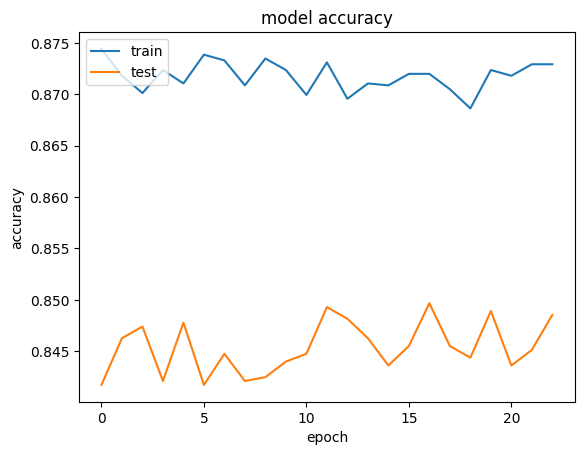

In [110]:
## Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

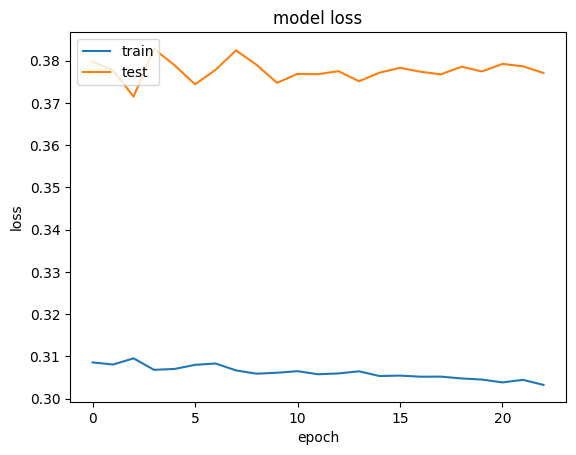

In [111]:
  ## Summarize history for loss
  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [112]:
## Part-3 Making the predictions & evaluating the model

# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [113]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1505,   90],
       [ 205,  200]])

In [114]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8525

In [115]:
# Calculate weights
classifier.get_weights()

[array([[-1.35745138e-01, -3.61285359e-02, -7.06944689e-02,
          5.06324023e-02, -4.19795811e-02,  1.32364944e-01,
          3.63343768e-02,  2.07270339e-01, -2.58221000e-01,
          2.59893537e-01,  5.25949180e-01],
        [-8.57239246e-01,  9.34692621e-02,  6.34076476e-01,
          1.13253939e+00,  8.59947577e-02, -4.09431994e-01,
         -8.68878007e-01,  3.47786490e-03, -6.05926394e-01,
         -5.63715279e-01, -1.33790210e-01],
        [-1.91151842e-01, -1.17118361e-04,  7.26967230e-02,
         -2.66338319e-01, -1.93696216e-01,  8.35458785e-02,
          1.32411532e-02, -2.71396726e-01,  1.45738021e-01,
          3.37683946e-01, -3.19848329e-01],
        [-1.14216700e-01,  1.04474433e-01, -2.22632602e-01,
          5.45262406e-03, -4.75455254e-01, -1.68041334e-01,
          1.76726937e-01, -5.74038267e-01,  6.94681704e-02,
         -8.01057577e-01, -3.14083189e-01],
        [ 3.30240615e-02,  9.43410218e-01, -1.39572835e-02,
         -1.96423098e-01, -1.34669960e+00, -